# Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
# Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

(group,landing_page) = (treatment, new_page). 

There are two possibility where new_page and treatment don't line up : 

first : (group,landing_page) = (treatment,old_page)

second : (group,landing_page) = (control,new_page)

In [6]:
first_df = len(df.query('group == "treatment" and landing_page == "old_page"'))

In [7]:
second_df = len(df.query('group == "control" and landing_page == "new_page"'))

In [8]:
e = first_df + second_df 
e

3893

f. Do any of the rows have missing values?

In [9]:
missing = df.isnull().sum()
missing

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No, there is no missing value.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In other words, I will be sure data only includes:
(group,landing_page) = (treatment, new_page) and
(group,landing_page) = (control, old_page) as dropping the others.

In [10]:
df2 = df.drop(df.query('group == "treatment" and landing_page != "new_page" | group == "control" and landing_page != "old_page"').index)

<span style="color: purple;">Double Check all of the correct rows were removed - this should be 0</span>.

In [11]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
duplicated_user = df2[df2['user_id'].duplicated()]
duplicated_user

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop([2893])

Now, checking if it is still duplicated or the code works:

In [16]:
df2[df2['user_id'].duplicated()].any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
p_control = df2.query('group == "control"').converted.mean()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
p_treatment = df2.query('group == "treatment"').converted.mean()
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
p_newpage = df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]
p_newpage 

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [21]:
obs_diff = p_treatment - p_control
print('Observed difference is: {}'.format(obs_diff))

Observed difference is: -0.0015782389853555567


* For now, it cannot be said that the new treatment page leads to more conversions, I haven't got any sufficient evidence to support the statement. 

* I found that p_control = 0.1203 = %12 and p_treatment = 0.1188 = %11. In other words, treatment groups' and control groups' converted rates are too close to each other to have an idea. There is only 0.001 difference between them as can be seen from obs_diff above. 

* The probability of received new page or old page comes out 50-50%.

* To decide the page treatment, I need to test null hypothesis and try to have more evidence.

<a id='ab_test'></a>
# Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

One-sided T-test:

**H_0:  𝑝𝑜𝑙𝑑 ≥ 𝑝𝑛𝑒𝑤**

**H_1: 𝑝𝑜𝑙𝑑  < 𝑝𝑛𝑒𝑤**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>


**Assuming $p_{new}$ = $p_{old}$**

**Sample size=ab_data sample size**

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [24]:
n_new = len(df2.query('landing_page == "new_page"'))
n_new

145310

d. What is $n_{old}$?

In [25]:
n_old = len(df2.query('landing_page == "old_page"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted.mean()

0.12005367834285322

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.1203312361468673

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
difference = new_page_converted.mean() - old_page_converted.mean()
print('Simulated difference is: {}'.format(difference))

Simulated difference is: -0.00027755780401408914


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

In [30]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([2.800e+01, 2.400e+02, 1.016e+03, 2.405e+03, 3.013e+03, 2.138e+03,
        9.120e+02, 2.230e+02, 2.200e+01, 3.000e+00]),
 array([-0.00415236, -0.00321767, -0.00228299, -0.0013483 , -0.00041361,
         0.00052108,  0.00145577,  0.00239046,  0.00332515,  0.00425984,
         0.00519453]),
 <BarContainer object of 10 artists>)

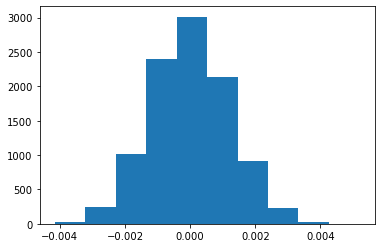

In [31]:
plt.hist(p_diffs) 

<span style="color: blue;">Looks pretty normal, it's a normal distribution.</span>


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

<span style="color: purple;">Creating distribution under the null hypothesis:</span>

In [32]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

<span style="color: blue;">red line shows the observed difference (obs_diff = p_treatment - p_control)
</span>.

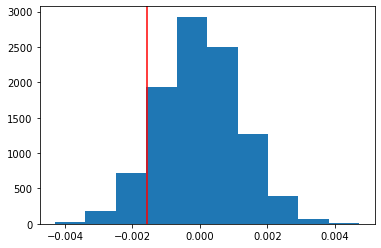

In [33]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, c='red')

<span style="color: purple;">Computing the p-value:
</span>

In [34]:
(null_vals > obs_diff).mean()

0.9059

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<span style="color: blue;">
I computed as called in scientific studies "p-value" in part j.
This statistic came from the null distribution, p-value = 0.91 > 0.05. So that, do not reject the 𝑝𝑛𝑒𝑤  =  𝑝𝑜𝑙𝑑, null hypothesis.
</span>


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = "smaller")
z_score, p_value

print('Z-score: {}'.format(z_score))
print('P-value of Z-Test: {}'.format(p_value))

Z-score: 1.3109241984234394
P-value of Z-Test: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<span style="color: blue;">
Both z-score and p-value computations from the test statistic suggest that findings fail to reject the null hypothesis. 
Also as being both of p-values are equal to 0.189,when calculated as not computing 'the alternative'. They agree with the findings in part j. and k. 
    </span>

<a id='regression'></a>
# Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<span style="color: blue;">
    
I want to predict categorical responses, that's why I will use `logistic regression`. </span>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2[['a_page', 'ab_page']] = pd.get_dummies(df2['group'])
#df2 = df2.drop('ab_page', axis=1) 
df2.head()

,user_id,timestamp,group,landing_page,converted,a_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

<span style="color: purple;">Instantiate logistic regression model
</span>


In [38]:
df2['intercept']= 1
logit_mod =sm.Logit(df2['converted'],df2[['intercept', 'a_page']])

<span style="color: purple;">Fit the model</span>

In [39]:
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<span style="color: purple;">Get summary statistics</span>

In [40]:
results.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-02-21 09:44 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
a_page        0.0150    0.0114     1.3109  0.1899  -0.0074   0.0374
==================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

About a_page results: 

* p-value=0.189~0.19
    
* type-1 error = 0.05
    
* p-value >> type-1 error
    
<span style="color: blue;"> Statistically, it is not significant in predicting the individuals convert or do not.</span>

<span style="color: purple;">to exponentiate</span>

In [41]:
np.exp(0.015)

1.015113064615719

* coefficient = e^0.015 ~ 1.015

<span style="color: blue;"> 
Individuals are 1.015 times likely convert the page as likely holding all else constant.</span>

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<span style="color: blue;">p-value=0.189~0.19 </span>
<span style="color: blue;">
I assumed that 𝑝𝑛𝑒𝑤 = 𝑝𝑜𝑙𝑑 in this two-sided T-test analysis in PartIII. The previous analysis was one-sided T-test and assumed 𝑝𝑛𝑒𝑤 > 𝑝𝑜𝑙𝑑 in PartII. </span>
    
<span style="color: blue;">The null and alternative hypotheses for two-sided T-test are: </span>
    
`H_0: 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑  = 0`

`H_1: 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 != 0`
    
<span style="color: blue;">The null and alternative hypotheses for one-sided T-test were:</span>
    
`H_0: 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 ≤ 0`

`H_1: 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 > 0`
    
<span style="color: blue;">The p-value for both of them is 0.1899 when two-tailed tested without specifying the alternative. </span>


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<span style="color: blue;">In some cases, a factor could be really important to affect the result. In such a case, believe that adding the factor into improves the model. I may try to see whether important or not, as calculating the correlation coefficient, then decide to hold or remove it. On the other hand, I may add too many factors and my model would has an over-fitting problem and misleading results. Also, there is another disadvantage that multicollinearity can be occur if these additional factors correlated.</span>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [43]:
df_new.head()

,country,timestamp,group,landing_page,converted,a_page,ab_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1


<span style="color: purple;">Countries:</span>

In [44]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

<span style="color: purple;">Creating the necessary dummy variables  : UK,US,CA</span>

In [45]:
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new.country)

<span style="color: purple;">Dropping CA</span>

In [46]:
df_new.head()

,country,timestamp,group,landing_page,converted,a_page,ab_page,intercept,UK,US,CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1,0,1,0


<span style="color: purple;">Logit Model</span>

In [47]:
model = sm.Logit(df_new.converted, df_new[['intercept', 'ab_page', 'UK', 'CA']])

<span style="color: purple;">Fitting the model</span>

In [48]:
results_new = model.fit()
results_new.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 21 Feb 2022   Pseudo R-squ.:               2.323e-05
Time:                        09:44:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK            -0.0506      0.028     -1.784      0.074      -0.106       0.005
CA            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

p_value @UK : 0.07

p_value @CA : 0.46

p-values >> type-I error

<span style="color: blue;">The p-values indicate that there is no country impact on conversion.</span>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [53]:
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_US'] = df_new['ab_page'] * df_new['US']
df_new['ab_CA'] = df_new['ab_page'] * df_new['CA']

<span style="color: purple;">Logit Model</span>

In [54]:
lmodel = sm.Logit(df_new["converted"], df_new[["intercept", "ab_page", "UK", "CA", "ab_UK", "ab_CA"]])

<span style="color: purple;">Fitting the model</span>

In [55]:
results_factor = lmodel.fit()
results_factor.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 21 Feb 2022   Pseudo R-squ.:               3.482e-05
Time:                        09:44:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
UK            -0.0118      0.040     -0.296      0.767      -0.090       0.066
CA             0.0057      0.019      0.306      0.760      -0.031       0.043
ab_UK         -0.0783      0.057     -1.378      0.168      -0.190       0.033
ab_CA         -0.0314      0.027     -1.181      0.238      -0.084       0.021
==============================================================================
"""

In [52]:
1/np.exp(results_factor.params)

intercept    7.331806
ab_page      0.989224
UK           1.011854
CA           0.994272
ab_UK        1.081428
ab_CA        1.031896
dtype: float64

<span style="color: blue;">  According to statistical results above,both ab_UK and ab_CA p-values are more than Type-I error(0.05). If I consider all others constant, a user in UK is 1.08 times more likely to convert while a user in CA is 1.03 times more likely to convert. Their impacts are really small. Moreover, the results are not reliable enough to talk about a sigficant effects on conversion based on the individual factors of country and page.</span>


`All A/B testing results shows findings do not prove enough significant evidence for rejecting the null hypothesis. It is better to not change the website from the old_page to the new_page, because there would not be any change so it will be a loss of time and effort.`